# Week 1
## Notebook 2: Geospatial Visualisation, Further Exploration of Dataframes and Bar Charts

### Our dataset
This dataset is based on citizen's reports to FixMyStreet.com regarding problems with pavements or potholes. For each report there is a category assigned, the longitude and the latitude are provided, as well as some datazone information (name of the datazone and code).<br>

Source: https://www.fixmystreet.com/

### Aims
1. Reinforce some of the concepts covered earlier
2. Introduce and learn how to apply further dataframes manipulation techniques 
3. Learn how to use gmplot to create geospatial visualisations
4. Learn about bar charts



In [2]:
import pandas as pd
import gmplot #library we will use as part of the geospatial plot
import numpy as np
import matplotlib.pyplot as plt

### Recall: Reading from a csv
In the previous notebook, we learned how to read from a csv file and create a dataframe. 

In [3]:
dataframe = pd.read_csv("fix_myStreetGlasgow.csv", sep=',')

### Your turn

1. What are the columns of the dataframe? 
2. Get the last 10 elements of the dataframe
3. What are the minimum and maximum latitude and longitude?

In [7]:
#print the columns of the dataframe
print (dataframe.ATTRIBUTE)

#last 10 elements
print (dataframe.FUNCTION)

#min and max longitude/latitude
print (str(dataframe['COLUMN_NAME'].FUNCTION + ' is the min')
print (str(dataframe['COLUMN_NAME'].FUNCTION) + ' is the max')



### Expected Output
columns: Index(['category', 'latitude', 'longitude', 'datazone', 'name'], dtype='object')

last 10 elements: 


 |category | latitude|longitude|datazone|name| 
|:-------|:--------|:--------|:--------|:---|
|Potholes| 55.81172|  -4.33927 | S01009782| Nitshill - 08  |
|Pavements/footpaths|  55.84243|   -4.27378|  S01009881 | Pollokshields East - 01|
| Potholes | 55.87842 | -4.27847|  S01010307| Firhill - 07|  
|Potholes|  55.86728 |  -4.23603|  S01010262| City Centre East - 04   |
|Potholes|  55.88295 |  -4.30497 | S01010412 |Kelvinside and Jordanhill - 05  |
|Pavements/footpaths | 55.85108 |  -4.32594 | S01009851 |Craigton - 04  |
|Pavements/footpaths | 55.84770 | -4.22407  |S01010053 |Parkhead West and Barrowfield - 05  |                 
|Pavements/footpaths | 55.83499 |  -4.36386 | S01009804   |Pollok North and East - 06  |
|Pavements/footpaths | 55.87559 |  -4.13677 | S01010117  | Garthamlock, Auchinlea and Gartloch - 05  |
|Pavements/footpaths | 55.83467 |  -4.26067 | S01009888 | Govanhill West - 02|  

Min and max latitude: <br>
Max latitude: 55.926809999999996
Min latitude: 55.784009999999995


### Visualising Our Data

We have a list of potholes and pavements problems and it would be quite useful to see where those are and which areas it would be a good idea to avoid because of their bad road conditions. Here you will be introduced to using gmplot to visualise geographical data. You provide gmplot with longitude and latitude, then based on Google Maps gmplot plots the coordinates and stores an hmtl file with a geographical heatmap in your workspace. 

### What's a heatmap? 
Heatmaps use colour-coding to present different values. In our particular case, if we see a lot of red on the map that means there are many road problems in a particular area of Glasgow. 

Heatmaps can be applied to a different range of domains such as: #TODO




In [4]:
# take the latitudes and longitudes
latitudes = dataframe["latitude"]
longitudes = dataframe["longitude"]

# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(55.8721,-4.2882,10)

# Overlay our datapoints onto the map
gmap.heatmap(latitudes, longitudes)

# Generate the heatmap into an HTML file
gmap.draw("Glasgow_heatmap.html")

### Filtering

It was great to see our potholes visualised but sometimes we want to have our data quantified. Currently, we have a single record per pothole per region but it would be nice to get a summary of the problems per datazone. 

Essentially, what we want to achieve is having the results in the following form:

| name | potholes | 
|:-------|:--------|
| Alexandra Parade - 03 | 3 |
| Anderston - 01        | 7 |
| ...                   | ... |

The next few cells will cover the following concepts: 
1. filtering based on a value
2. grouping by a column to obtain a statistic
3. creating a new dataframe


NOTE: While there is a method called filter in pandas, we are not going to use it as part of this exercise as it only allows us to filter on the specified index. 

In [6]:
#returns only the rows for which the category is potholes
#print (dataframe['category']=='Potholes')
#the result we get is the column of the dataframe with true/false values signifying whether the entry is a pothole or not.
#What we want next is based on those values to pull only the true value entry and pandas do that for us
dataF = dataframe[dataframe['category'] == 'Potholes']

#Printing dataF to see that we are only left with only entries classified as potholes
#print (dataF)

#once we have only the potholes, we want to aggregate the results based on the name of the datazone and count the total number of potholes
dataF = dataF.groupby('name', as_index=False)

#for name in dataF: 
 #   print (name)
    

In [7]:
#So far: only potholes in our data, grouped-by the datazone where they were reported.

#Next goal: count the potholes/pavement issues in the same zone

dataF = dataF['category'].count()

#Now when we have that, we would lile to store it in a new dataframe 

dataPo = pd.DataFrame(data=dataF).rename(index=str, columns={"name": "Datazone", "category": "Potholes"})

print (dataPo.head(10))

                Datazone  Potholes
0  Alexandra Parade - 03         3
1         Anderston - 01         7
2         Anderston - 02         9
3         Anderston - 03         1
4         Anderston - 04         2
5         Anderston - 05        10
6         Anderston - 06         6
7   Anniesland East - 01         4
8   Anniesland East - 02         9
9   Anniesland East - 03         3


### Task
Now when you know how filtering work, please complete the following exercises: 
1. What are the datazones with more than 13 potholes? 
2. What's the maximum number of potholes recorded? 


In [13]:
#dataPo13 dataframe to store the entries with more than 13 potholes. You may find > helpful.Recall how we applied filtering condition earlier. 
#HINT: the dataframe we base our analysis on is dataPo13
dataPo13 = DATAFRAME_NAME[DATAFRAME_NAME['Potholes']>13]
print (dataPo13)

#based on dataPo dataframe identify max number of potholes recorded
maxPotholes = dataPo[column_name].FUNCTION

### Your turn

Based on the earlier example, create a dataframe, called **dataPav** that contains the datazones and the count of pavements/footpath issues. Follow the steps outlined below if you are stuck: 

1. Filter the data based on whether the value of the 'category' is 'Pavements/footpaths'
2. Group it by 'name' and count the total occurences per datazone
3. Create a new dataframe, called **dataPav**, with columns: 'Datazone' and 'Pavements'


In [8]:
#returns only the rows for which the category is pavements. HINT: Check whether you got the correct field name
dataPav = dataframe[dataframe['category'] == "Pavements/footpaths"]

#check the size of your dataframe; your result should be 2185 entries
print (dataPav.size)


2185


In [9]:
#same as above
dataPav = dataPav.groupby('name', as_index=False)['category'].count()

#creat 
dataPav = pd.DataFrame(data=dataPav).rename( columns={"name": "Datazone", "category": "Pavements"})

print (dataPav.head(10))

                Datazone  Pavements
0         Anderston - 01          1
1         Anderston - 05          1
2         Anderston - 06          2
3   Anniesland East - 02          2
4   Anniesland East - 05          2
5   Anniesland West - 03          1
6   Anniesland West - 04          2
7   Anniesland West - 06          1
8   Anniesland West - 08          2
9  Baillieston East - 01          1


### Concatenating dataframes

Assuming your code for the previous task works, now you should have 2 dataframes: 

1. dataPo: containing 2 columns, the name of the datazone and the count of potholes for that datazone
2. dataPav: containing 2 columns, the name of the datazone and the count of reported pavement problems

Ideally, what we want to do is to have one dataframe that combines the data from dataPo and dataPav. Since the column 'Datazone' is common for the two dataframes, we want to use it to join them together.



In [10]:
#concatenating the two dataframes
result = pd.merge(dataPo,dataPav, how='outer')
print (result.head(10))


                Datazone  Potholes  Pavements
0  Alexandra Parade - 03       3.0        NaN
1         Anderston - 01       7.0        1.0
2         Anderston - 02       9.0        NaN
3         Anderston - 03       1.0        NaN
4         Anderston - 04       2.0        NaN
5         Anderston - 05      10.0        1.0
6         Anderston - 06       6.0        2.0
7   Anniesland East - 01       4.0        NaN
8   Anniesland East - 02       9.0        2.0
9   Anniesland East - 03       3.0        NaN


### Expected Output

| Datazone | Potholes|Pavements| 
|:-------|:--------|:--------|
| Alexandra Parade - 03 | 3 .0|NaN|
| Anderston - 01   |    7.0    |   1.0|
|Anderston - 02    |   9.0     |   NaN|
|Anderston - 03    |   1.0     |   NaN|
|Anderston - 04    |   2.0     |   NaN|
|Anderston - 05    | 10.0      |  1.0|
|Anderston - 06    |  6.0      |  2.0|
|Anniesland East - 01|4.0|   NaN|
|Anniesland East - 02|9.0|   2.0|
|Anniesland East - 03|3.0|   NaN|  


### Side Note
What happens when you print the resulting dataframe? 

Sometimes the count value is **NaN**.

Why? Since no problems have been reported for this area. Maybe there are no road problems for those datazones or maybe they haven't been reported. In a few words, we don't know, and therefore we have **missing data**.

There are different techniques for dealing with missing data and they will be discussed later but for now we choose to replace all missing values with 0, as we can make the assumption that there are no road problems. 


In [18]:
result = result.fillna(0)
print (result.head(10))

                Datazone  Potholes  Pavements
0  Alexandra Parade - 03       3.0        0.0
1         Anderston - 01       7.0        1.0
2         Anderston - 02       9.0        0.0
3         Anderston - 03       1.0        0.0
4         Anderston - 04       2.0        0.0
5         Anderston - 05      10.0        1.0
6         Anderston - 06       6.0        2.0
7   Anniesland East - 01       4.0        0.0
8   Anniesland East - 02       9.0        2.0
9   Anniesland East - 03       3.0        0.0


Expected Output

 | Datazone | Potholes|Pavements| 
|:-------|:--------|:--------|
| Alexandra Parade - 03 | 3 .0|0.0|
| Anderston - 01   |    7.0    |   1.0|
|Anderston - 02    |   9.0     |   0.0|
|Anderston - 03    |   1.0     |   0.0|
|Anderston - 04    |   2.0     |   0.0|
|Anderston - 05    | 10.0      |  1.0|
|Anderston - 06    |  6.0      |  2.0|
|Anniesland East - 01|4.0|   0.0|
|Anniesland East - 02|9.0|   2.0|
|Anniesland East - 03|3.0|   0.0|  

### Visualising our comparison
We have a dataframe containing the each datazone and the corresponding number of road issues. However, a picture is worth a thousand words and we will achieve a much better understanding of our data if we can see how the number of reported problems varies. 

Bar charts are used to compare categories and the height of the bars is proportional to the values they represent. 


### Your turn
Before diving into creating a bar chart, let's get some numbers from our data. 

1. What's the max number of potholes recorded?
2. What's the max number of pavement issues?

In [ ]:
#calculate the max number of potholes
maxPotholes = 

print ("Max potholes: "+ str(maxPotholes))

maxPave = 

print ("Max pavement issues: "+ str(maxPave))

#### Expected output

Max potholes: 60.0

Max pavement issues: 13.0

### Creating a bar chart

While it's important to fix all potholes, we want to prioritise datazones with more severe conditions, so we are going to pick a threshold number and we are only going to consider datazones with recorded potholes above this threshold. For the purposes of this example, we are going to pick 15 as our threshold. 


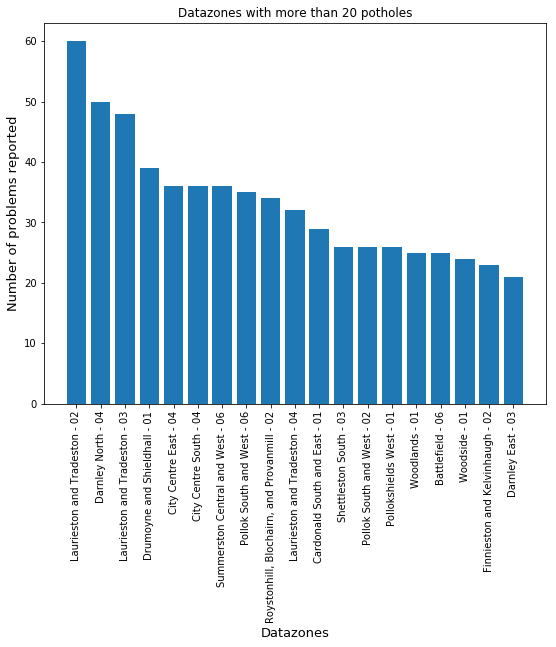

In [49]:
#datazones with more than 20 potoholes ordered in a descending order
resultPotholes = result[result['Potholes']>20].sort_values(by='Potholes', ascending = False)
plt.figure(figsize=(9,7))
#creating the bar chart
plot = plt.bar(resultPotholes['Datazone'],resultPotholes['Potholes'], align='center')
#code to set labels and titles
plt.xlabel('Datazones', fontsize=13)
plt.title("Datazones with more than 20 potholes")
plt.xticks(rotation=90)
plt.ylabel('Number of problems reported',fontsize=13)
plt.show()

### Your turn

Create a similar bar chart for pavement issues

In [53]:
resultPavements = result[condition].sort_values(by=COLUMN_NAME, ascending = False)
plt.figure(figsize=(9,7))
plot = plt.bar(x_VALUES,y_VALUES)
plt.xlabel('Datazones', fontsize=13)
plt.title(TITLE_HERE)
plt.xticks(rotation=90)
plt.ylabel('Number of problems reported',fontsize=13)
plt.show()